<a href="https://colab.research.google.com/github/alanmejiaa/Procesamiento-y-Clasificacion-de-Datos/blob/main/Practica%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 2**

Dependiendo del tipo de datos que Uds. estén
manejando para su proyecto, van a realizar un análisis inicial de sus datos. Justifiquen el
uso de ellos, y como están orientados a resolver su problemática propuesta.

# Importamos librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Cargamos la base de datos a trabajar

In [ ]:
df = pd.read_csv('train.csv')

Observamos los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Nuestras variables:


*   **PassengerId:** Id de cada pasajero
*   **Survived:** El pasajero sobrevivio (1) o No sobrevivio (0)
*   **Pclass:** Clase en la que estaba abordo el pasajero
*   **Name:** Nombre del pasajero
*   **SSex:** Sexo del pasajero
*   **Age:** Edad del pasajero
*   **SibSp:** Numero de hermanos o conyuges abordo por pasajero
*   **Parch:** Numero de padres o hijos abordo por pasajero
*   **Ticket:** Identificador de cada ticket
*   **Fare:** Precio del ticket
*   **Cabin:** Cabina en la que dormian
*   **Embarked:** Embarque al que pertenecian

Como observamos en algunas variables si contamos con la informacion completa, pero otras esta incompleta.

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Retiramos variables que consideramos no sera relevante incluir en nuestro modelo

In [ ]:
#Retiramos 'nombre','ticket'
df.drop(['Name','Ticket'], axis=1, inplace=True)

In [ ]:
#Le hacemos una prueba de duplicado
df.duplicated().any()

False

Observaremos la proporcion entre sobrevivientes y fallecidos

El porcentaje de sobrevivientes es : 0.38
El porcentaje de fallecidos es : 0.62


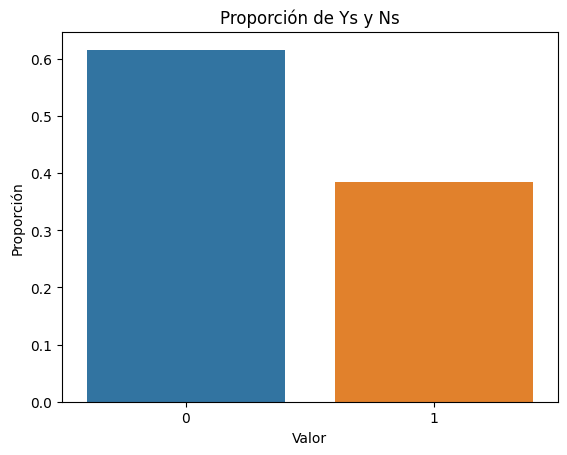

In [ ]:
proporcion = df['Survived'].value_counts(normalize=True)
sns.barplot(x=proporcion.index, y=proporcion.values)
plt.xlabel('Valor')
plt.ylabel('Proporción')
plt.title('Proporción de Ys y Ns')
print('El porcentaje de sobrevivientes es : %.2f' % (df['Survived'].value_counts()[1] / len(df)))
print('El porcentaje de fallecidos es : %.2f' % (df['Survived'].value_counts()[0] / len(df)))
plt.show()

Obrevamos que unicamente sobrevivio el 38% de los pasajeros

Text(0, 0.5, 'Personas')

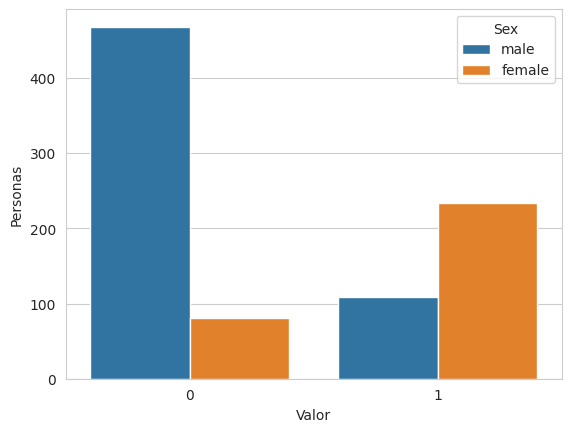

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.xlabel('Valor')
plt.ylabel('Personas')

Observamos que la mayoria de muertes fueron de hombres.